In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

solar = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역1\\구역1_태양광.csv',
                     encoding='utf-8')
charger = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\클러스터링\\구역1\\구역1_충전소.csv',
                     encoding='utf-8')

In [2]:
add_list = charger['주소']
add_list = add_list.tolist()
len(add_list)

809

In [3]:
import requests
import json

def getLatLng(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    headers = {"Authorization": "KakaoAK "+"3f188fee604842b02f632b746afb371b"}
    result = json.loads(str(requests.get(url, headers=headers).text))
    status_code = requests.get(url, headers=headers).status_code
    if(status_code != 200):
        print(f"ERROR: Unable to call rest api, http_status_coe: {status_code}")
        return 0
    

    try:
        match_first = result['documents'][0]['address']
        lon = match_first['x']
        lat = match_first['y']

        return lat, lon
    except IndexError: 
        return 0
    except TypeError: 
        return 0
    
location = []
for i in add_list:
    getLatLng(i)
    location.append(getLatLng(i))

In [7]:
for i in range(len(location)):
    #location[i] = list(location[i])
    try:
        location[i] = list(location[i])
    except TypeError:
        location[i] = [0,0]

In [8]:
y = []
for i in range(len(location)):
    y.append(location[i][0])
    
x=[]
for i in range(len(location)):
    x.append(location[i][1])

In [9]:
x_ = x
y_ = y

In [20]:
charger['y'] = y
charger['x'] = x
charger_copy = charger.copy()
charger_copy

,주소,y,x
0,서울특별시 강남구 남부순환로3104,37.4956786590374,127.071912029293
1,서울특별시 강남구 개포로 621,37.4941313928275,127.078783141187
2,서울특별시 송파구 양재대로 932,37.4945376921828,127.108713599026
3,서울특별시 강남구 삼성로 628,37.5159106576619,127.05214255205
4,서울특별시 강남구 선릉로108길 27,37.5103126002296,127.04637956875
...,...,...,...
804,서울특별시 강남구 테헤란로29길 5,37.5019677255362,127.03872448505
805,서울특별시 동작구 보라매로5길 20보라매병원_행복관 지상2층(425 서울특별시보라매...,37.493013748157,126.924332456243
806,서울특별시 동작구 장승배기로 161(47-2 동작구청),37.51252777344,126.939942092863
807,서울특별시 송파구 송파대로37길 77(가락동 910),37.4988841772964,127.104383431798


In [22]:
charger_copy.to_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\charger_loc__.csv',
                       encoding='cp949')

In [66]:
charger_new = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역1\\구역1_충전소.csv',
                     encoding='cp949')

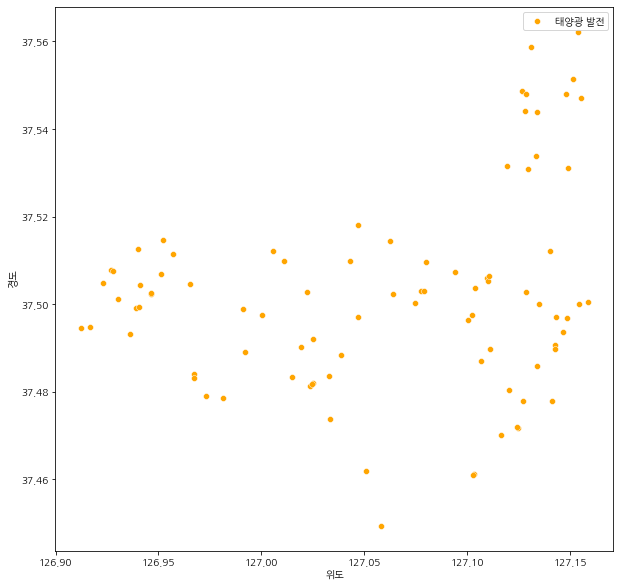

In [67]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
#sns.scatterplot(data=charger_new, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()

In [68]:
import folium

lat = solar['y'].mean()
long = solar['x'].mean()

m = folium.Map([lat,long],zoom_start=9)

In [39]:
for i in solar.index:
    tmp_lat =  solar.loc[i,'y']
    tmp_long = solar.loc[i,'x']
    
    folium.Marker([tmp_lat,tmp_long],icon=folium.Icon(color='orange')).add_to(m)

for i in charger_new.index:
    tmp_lat_02 =  charger_new.loc[i,'y']
    tmp_long_02 = charger_new.loc[i,'x']
    
    folium.Marker([tmp_lat_02,tmp_long_02],icon=folium.Icon(color='green')).add_to(m)

#m

In [50]:
from sklearn.cluster import KMeans

# centroids = solar.sample(5, random_state=1)
# centroids

,주소,y,x
60,서울특별시 송파구 석촌호수로 155,37.507265,127.094217
69,서울특별시 송파구 충민로2길 20,37.477938,127.127127
53,서초구 남부순환로340길 58,37.481196,127.023434
54,서초구 남부순환로323길 44-15,37.483304,127.014670
70,서울특별시 송파구 오금로53길 32,37.496940,127.143304


In [37]:
# from folium.plugins import MarkerCluster

# latlong = solar[['y', 'x']]

# marker_cluster = MarkerCluster().add_to(m)

# for lat, long in zip(latlong.y, latlong.x):
#     folium.Marker([lat,long], icon = folium.Icon(color="orange")).add_to(marker_cluster)
    
# latlong_02 = charger_new[['y','x']]

# marker_cluster_02 = MarkerCluster().add_to(m)

# for lat, long in zip(latlong_02.y, latlong_02.x):
#     folium.Marker([lat,long],icon = folium.Icon(color='green')).add_to(marker_cluster)

In [69]:
import scipy as sp
from sklearn.datasets import make_blobs

# centroids_new = centroids[['y','x']]
# distance = sp.spatial.distance.cdist(solar[['y','x']], centroids_new, "euclidean")

# cluster_num = np.argmin(distance, axis=1)

# result = solar.copy()
# result['cluster'] = np.array(cluster_num)
# result

In [120]:
charger_clu = charger_new[['y','x']]
model_ch = KMeans(n_clusters = 5, algorithm = 'auto')
model_ch.fit(charger_clu)
predict=pd.DataFrame(model_ch.predict(charger_clu))
predict.columns=['predict']

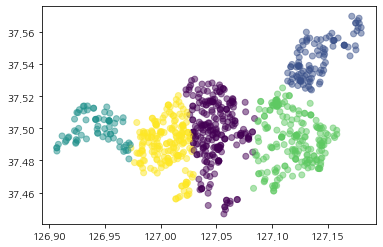

In [121]:
r = pd.concat([charger_clu,predict],axis=1)

plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)

In [122]:
solar_clu = solar[['y','x']]
model_so = KMeans(n_clusters = 5, algorithm = 'auto')
model_so.fit(solar_clu)
predict_solar=pd.DataFrame(model_so.predict(solar_clu))
predict_solar.columns=['predict']

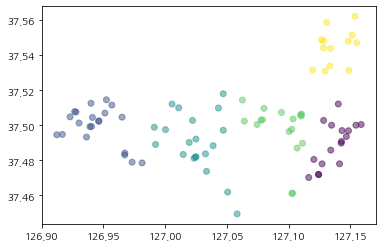

In [123]:
r_solar = pd.concat([solar_clu,predict_solar],axis=1)

plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)

(array([126.925, 126.95 , 126.975, 127.   , 127.025, 127.05 , 127.075,
        127.1  , 127.125, 127.15 , 127.175]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

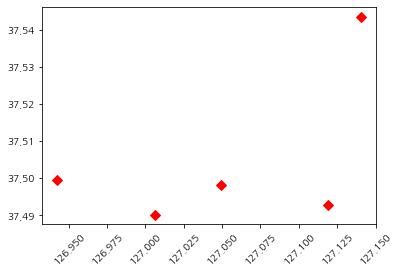

In [124]:
centers_charger = pd.DataFrame(model_ch.cluster_centers_,columns=['y','x'])
center_x = centers_charger['x']
center_y = centers_charger['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xticks(rotation='45')

(array([126.925, 126.95 , 126.975, 127.   , 127.025, 127.05 , 127.075,
        127.1  , 127.125, 127.15 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

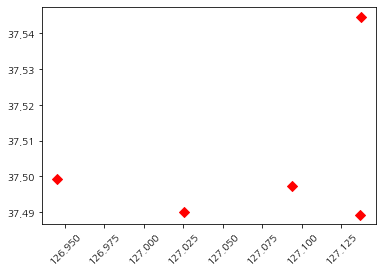

In [125]:
centers_solar = pd.DataFrame(model_so.cluster_centers_,columns=['y','x'])
center_x_solar = centers_solar['x']
center_y_solar = centers_solar['y']
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.xticks(rotation='45')

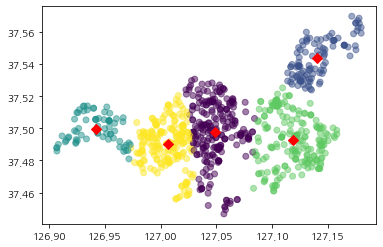

In [126]:
#충전소
plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

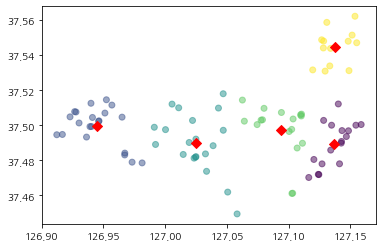

In [127]:
#태양광
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')

중점:37.50441381121015, 127.05956536922704


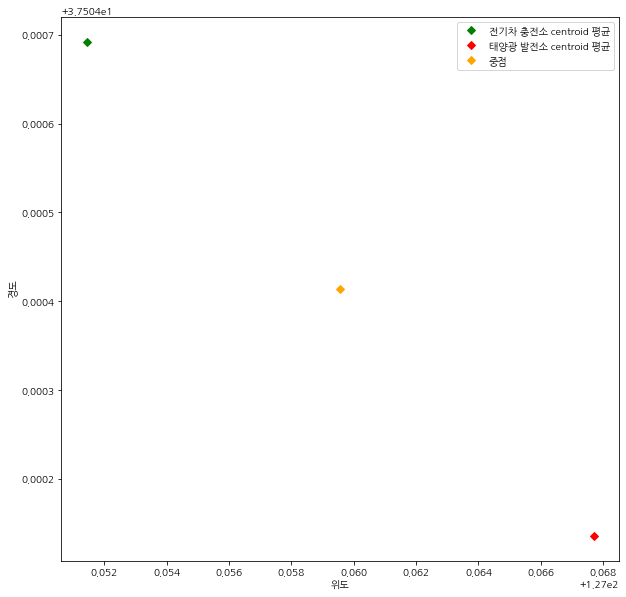

In [137]:
center_x_list = np.array(center_x)
center_y_list = np.array(center_y)

center_x_solar_list = np.array(center_x_solar)
center_y_solar_list = np.array(center_y_solar)

c_x = center_x_list.mean()
c_y = center_y_list.mean()

c_x_s = center_x_solar_list.mean()
c_y_s = center_y_solar_list.mean()

mean_x = (c_x+c_x_s)/2
mean_y = (c_y+c_y_s)/2

print('중점:{0}, {1}'.format(mean_y,mean_x))

fig = plt.figure(figsize=(10,10))
plt.plot(c_x,c_y,'D',color='green',label='전기차 충전소 centroid 평균')
plt.plot(c_x_s, c_y_s, 'D',color= 'red',label='태양광 발전소 centroid 평균')
plt.plot(mean_x, mean_y,'D', color='orange',label='중점')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()
plt.show()




# new_center_x = []
# new_center_y = []

# for i in range(5):
#     new_center_x.append((center_x_list[i]+center_x_solar_list[i])/2.0)
#     new_center_y.append((center_y_list[i]+center_y_solar_list[i])/2.0)

# print("x좌표:{}".format(new_center_x))
# print("y좌표:{}".format(new_center_y))
# fig = plt.figure(figsize=(10,10))
# sns.scatterplot(x=new_center_x, y = new_center_y, s=50)
# plt.xticks(rotation='45')
#강남구

In [138]:
# fig = plt.figure(figsize=(10,10))
# sns.scatterplot(x=new_center_x, y = new_center_y, s=50,marker='D',color='r')
# sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
# sns.scatterplot(data=charger_new, x='x',y='y',color='green',label='전기차 충전소')